# Additional layers for waterfall_plot
This notebook demonstrates how to enrich a waterfall plot with background and foreground layers. Foreground layers can be added using the regular `+` operator. To add background layers, use the new `background_layers` property.

Limitations:
- Layers must provide their own data
- Data coordinates are expected to be numeric




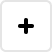
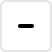
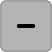
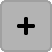
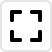
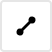
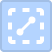
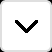
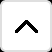
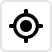
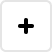
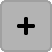
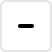
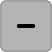
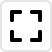
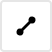
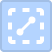
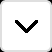
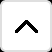
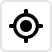

In [1]:
from lets_plot import *
from lets_plot.bistro import waterfall_plot

import numpy as np
import pandas as pd

LetsPlot.setup_html() 

In [2]:
# Base plot data
df = pd.DataFrame({
    "Company": ["Badgersoft"] * 10,
    "Accounts": ["initial", "revenue", "costs", "revenue", "costs", "revenue", "costs", "revenue", "costs", "total"],
    "Values": [200, 200, -150, 250, -170, 150, -50, 280, -25, None],
    "Measure": ['absolute', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'relative',
                'relative', 'total'],
})


# Additional layers data
quoter_text_data = {
    'name': ['Q1', 'Q2', 'Q3', 'Q4'],
    'x': [1, 3, 5, 7],
    'y': [725] * 4
}

ai_status_data = {
    'text': ['Before AI\nIntroduction', 'After AI\nIntroduction'],
    'period_start': [0.5, 4.5],
    'period_end': [4.5, 8.5],
    'ai_introduced': [False, True],
    'text_x': [2.5, 6.5],
    'text_y': [120, 120]
}

waterfall_plot(df, "Accounts", "Values", measure="Measure", group="Company",
               background_layers=
                   geom_band(
                       aes(
                           xmin='period_start', 
                           xmax='period_end', 
                           paint_a='ai_introduced'  # paint_a to keep the default waterfall colors
                       ),  
                       data=ai_status_data,
                       alpha=0.2,
                       fill_by='paint_a',
                       color_by='paint_a'
                   )
               ) + \
    geom_text(aes(x='x', y='y', label='name'), data=quoter_text_data, size=8) + \
    geom_text(aes(x='text_x', y='text_y', label='text'), data=ai_status_data, size=12) + \
    scale_hue('paint_a', guide='none') + \
    ggsize(750, 450) + \
    ggtitle("Waterfall with additional layers")